# More 3D Coordinate Transformations

We have already shown how Python is capable of performing and visualising the standard set of operations for 3D graphics transformations.

There are several additional useful operations than can be performed by matrices. This notebook will examine two of these: *reflection in a given plane* and *rotation about an axis*.

In [1]:
## Libraries
import numpy as np
import math 
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

## Mirror reflection in a given plane

We have been shown in the lectures that reflecting an object in the plane $ ax+by+cz=0$ can be performed by multiplying a set of homogenous coordinates by the reflection matrix

$$
M_{\rm{reflection}} = 
	{\begin{pmatrix}
	-a^2+^2+c^2 & -2ab & -2ac & 0  \\
	-2ab & a^2-b^2+c^2 & -2cb & 0  \\
	-2ac & -2bc & a^2+b^2-c^2 & 0  \\
	a & b & c & a^2+b^2+c^2 
	\end{pmatrix}}.
$$

The additional factor of $a^2+b^2+c^2$ in the bottom right element of this matrix means that we must remember to check that we have returned to homogenous coordinates after the calculation has been carried out.

To test this, we will repeat one of the examples shown in the lectures:

### Lecture Example:
**Calculate the images of the points $(3,2,1)$ and $(-1,0,1)$ when reflected in the plane $2x+y-3z=4$**.


Let's set up a matrix of positions that we can transform. 

In [2]:
x_vals = np.array([3, -1])
y_vals = np.array([2, 0])
z_vals = np.array([1, 1])
p = np.array([x_vals, y_vals, z_vals])

Before we perform the transformation, let's plot the two positions and (because we can) draw a line between the two points:

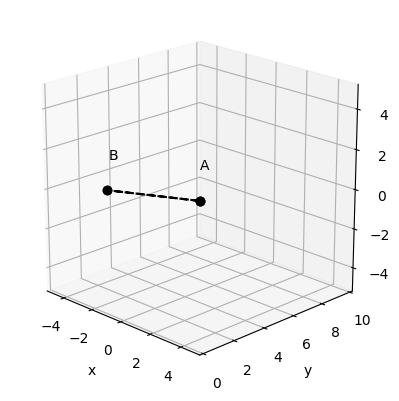

In [3]:
lx=np.append(x_vals,x_vals[0]) #drawing the line between the last and first coord
ly=np.append(y_vals,y_vals[0])
lz=np.append(z_vals,z_vals[0])
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=315, roll=0)
ax.plot(lx, ly, lz, 'ko', linestyle="--")
ax.plot(x_vals, y_vals, z_vals, 'ko')
ax.text(lx[0]-1, ly[0]+1, lz[0]+1, "A", c='k')
ax.text(lx[1]-1, ly[1]+1, lz[1]+1, "B", c='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(left=-5, right=5) 
ax.axes.set_ylim3d(bottom=0, top=10) 
ax.axes.set_zlim3d(bottom=-5, top=5)
plt.gca().set_aspect('equal')
plt.show()

When using Python this way, we need to remember i) to convert our arrays into the correct shape vector and ii) to include homogenous coordinates. In this case, rather than specifying the number of 1's needed, I will use Python to count the number of coordinate locations and produce an array of the same length. This new array is initialised by "1" in each element: this saves me having to do this manually, and can be extended easily if we introduce more coordinates into the problem.

Thus we can create our matrix of coordinates, formatted in the same way shown in class:

In [4]:
nr = [1 for x in range(len(x_vals))]
hp = np.vstack([p, nr])
print(hp.transpose())

[[ 3  2  1  1]
 [-1  0  1  1]]


Now we can turn our attention to the reflection matrix. 

We can only perform the calculation if the plane passes through the origin. A quick way to check is to see if the origin coordinates satisfy the plane equation:



In [5]:
a = 2
b = 1
c = -3
d = 4
print("LHS:", a*0+b*0+c*0)
print("RHS:", d)

LHS: 0
RHS: 4


Since the left and right hand sides of the plane equations do not match, the origin is not a solution of this equation. This means we need to translate our points, using the translation matrix we discussed previously:

$$
T_{\underline{w}} = 
	{\begin{pmatrix}
	1 & 0 & 0 & 0  \\
	0 & 1 & 0 & 0  \\
	0 & 0 & 1 & 0  \\
	a_x & a_y & a_z & 1 
	\end{pmatrix}},
$$

To identify the amount we need to move, we can rearrange the plane equation, so that if we choose some points for $x$ and $y$, the equation will determine values of z:


In [6]:
x1 = 1.
y1 = 2.
z1 = (a * x1 + b * y1 - d) / c
print(x1,y1,z1," lies on plane")

1.0 2.0 -0.0  lies on plane


This is the amount we will translate by (and while we are at it, we might as well create the opposite transformation that we'll have to use at the end too).

In [7]:
Tw = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [-x1,-y1, -z1, 1]])
Tv = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [x1, y1, z1, 1]])

Now we can create our reflection matrix from the formula:

In [8]:
Mr = np.matrix([[-a*a+b*b+c*c, -2*a*b, -2*a*c, 0], 
                [-2*a*b, a*a-b*b+c*c, -2*c*b, 0], 
                [-2*a*c, -2*b*c, a*a+b*b-c*c, 0],
                [0,0, 0, a*a+b*b+c*c]])

We've formed all the pieces that will allow us to perform the reflection in full, so let's go ahead and apply them to our coordinates:

In [9]:
rp = hp.transpose()*Tw*Mr*Tv
print(rp)

[[ 38.  26.  20.  14.]
 [ 22.  18. -40.  14.]]


Following the transformation, we note that the final column (our homogenous coordinates) contain something other than one. This means we need to divide *all* coordinates in that row by the element in the final column, such that they become equal to one.

In [10]:
rph = rp/rp[:,3:]
print(rph)

[[ 2.71428571  1.85714286  1.42857143  1.        ]
 [ 1.57142857  1.28571429 -2.85714286  1.        ]]


These are the locations of the reflected image.

Finally, to demonstrate the power of Python, we can plot the images, the plane about which the reflection is performed and the original points for a visual comparison:

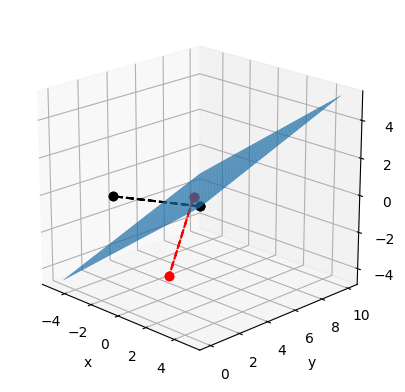

In [11]:
newp = rph[:,0:3].transpose()
x_vals1 = np.squeeze(np.asarray(newp[0,:]))
y_vals1 = np.squeeze(np.asarray(newp[1,:]))
z_vals1 = np.squeeze(np.asarray(newp[2,:]))
slx=np.append(x_vals1,x_vals1[0])
sly=np.append(y_vals1,y_vals1[0])
slz=np.append(z_vals1,z_vals1[0])
xr = [-5,5]
yr = [0,10]
zr = [-5,5]
ax.axes.set_xlim3d(left=xr[0], right=xr[1]) 
ax.axes.set_ylim3d(bottom=yr[0], top=yr[1]) 
ax.axes.set_zlim3d(bottom=zr[0], top=zr[1])
#need to set up mesh for plotting plane over range of x, y
x = np.linspace(xr[0],xr[1],50)
y = np.linspace(yr[0],yr[1],50)
X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=315, roll=0)
ax.plot(lx, ly, lz, 'ko', linestyle="--")
ax.plot(x_vals, y_vals, z_vals, 'ko')
ax.plot(slx, sly, slz, 'ro', linestyle="--")
ax.plot(x_vals1, y_vals1, z_vals1, 'ro')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
surf = ax.plot_surface(X, Y, Z)
plt.gca().set_aspect('equal')
plt.show()

We can see in this example that the points we need to reflect actually straddle the plane, which is why the reflected images also straddle the plane in the opposite sense.

## Rotation about an arbitrary axis

Another useful tool in our 3D transformation arsenal is the ability to rotate a point (or set of points) by a specified angle about a specified axis.

The formula required to carry out this operation is that shown in lectures (and also present in the formula book):

$$
	{R_{\theta,\underline{\hat{v}}}=
	\begin{pmatrix}
	\alpha^2(1-\cos\theta)+\cos\theta & \alpha\beta(1-\cos\theta)+\gamma\sin\theta & \alpha\gamma(1-\cos\theta)-\beta\sin\theta & 0   \\
	\alpha\beta(1-\cos\theta)-\gamma\sin\theta & \beta^2(1-\cos\theta)+\cos\theta & \beta\gamma(1-\cos\theta)+\alpha\sin\theta  & 0 \\
	\alpha\gamma(1-\cos\theta)+\beta\sin\theta & \beta\gamma(1-\cos\theta)-\alpha\sin\theta & \gamma^2(1-\cos\theta)+\cos\theta & 0 \\
	0 & 0 & 0 & 1 
	\end{pmatrix}},
$$

for a rotation by angle $\theta$ about the unit vector ${\vec{v}}=\alpha{\vec{i}}+\beta{\vec{j}}+\gamma{\vec{k}} $.

Let us examine the application of this matrix using another example from our lectures:

### Lecture example: Rotating a pyramid
**The pyramid defined by coordinates $O(0,0,0), B(1,0,0), C(0,1,0)$ and $D(0,0,1)$ is rotated by $45^o$ about the line that has direction $\vec{v}=\vec{j}+\vec{k}$ and passes through:**


1.   **the origin;**
2.   **the point C(0,1,0).**
**Obtain the vertices of the rotated figure in both cases.**


---




We will start by defining the coordinates specified in the question:

In [31]:
O = [0,0,0]
B = [1,0,0]
C = [0,1,0]
D = [0,0,1]
x_vals2=[O[0],B[0],C[0],D[0]]
y_vals2=[O[1],B[1],C[1],D[1]]
z_vals2=[O[2],B[2],C[2],D[2]]

Let us first begin by establishing what the pyramid looks like prior to any rotation:

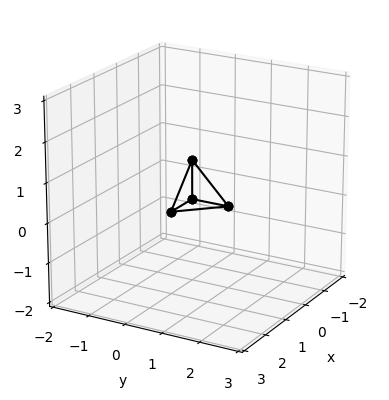

In [32]:
p2 = np.array([x_vals2, y_vals2, z_vals2])
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=30, roll=0)
ax.plot([O[0],C[0]], [O[1],C[1]], [O[2],C[2]], 'ko', linestyle='-')
ax.plot([O[0],B[0]], [O[1],B[1]], [O[2],B[2]], 'ko', linestyle='-')
ax.plot([O[0],D[0]], [O[1],D[1]], [O[2],D[2]], 'ko', linestyle='-')
ax.plot([C[0],B[0]], [C[1],B[1]], [C[2],B[2]], 'ko', linestyle='-')
ax.plot([C[0],D[0]], [C[1],D[1]], [C[2],D[2]], 'ko', linestyle='-')
ax.plot([D[0],B[0]], [D[1],B[1]], [D[2],B[2]], 'ko', linestyle='-')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axes.set_xlim3d(left=-2, right=3) 
ax.axes.set_ylim3d(bottom=-2, top=3) 
ax.axes.set_zlim3d(bottom=-2, top=3)
plt.gca().set_aspect('equal')
plt.show()

Now let us examine the axis of rotation. In order to be in the correct format to use in the rotation matrix taught in the lectures, we must make sure the axis of rotation is formatted as a unit vector.

In this case, I'm too lazy to check if the vector is unit or not: I'll just divide the vector by it's size (that way if the vector is already unit, dividing by its size won't change the vector):

In [33]:
v = [0,1,1]
v_hat = v / np.linalg.norm(v)
print(v_hat)

[0.         0.70710678 0.70710678]


We now have all the ingredients we need to fill the abitrary rotation matrix. We must remember that in Python, arguments for trigonometric functions must be in radians:

In [34]:
alpha = v_hat[0]
beta = v_hat[1]
gamma = v_hat[2]
theta = 45
st = np.sin(math.radians(theta))
ct = np.cos(math.radians(theta))
Rtv = np.matrix([[alpha*alpha*(1-ct)+ct, alpha*beta*(1-ct)+gamma*ct, alpha*gamma*(1-ct)-beta*st, 0], 
                [alpha*beta*(1-ct)-gamma*st, beta*beta*(1-ct)+ct, beta*gamma*(1-ct)+alpha*st, 0], 
                [alpha*gamma*(1-ct)+beta*st, beta*gamma*(1-ct)-alpha*st, gamma*gamma*(1-ct)+ct, 0],
                [0,0, 0, 1]])


Now that the rotation is stored in the matrix, we can carry out the transformation of the points as before:

In [35]:
nr2 = [1 for x in range(len(x_vals2))]
kp = np.vstack([p2, nr2])
print("original points:")
print(kp.transpose())
fp = kp.transpose()*Rtv
print("rotated points:")
print(fp)

original points:
[[0 0 0 1]
 [1 0 0 1]
 [0 1 0 1]
 [0 0 1 1]]
rotated points:
[[ 0.          0.          0.          1.        ]
 [ 0.70710678  0.5        -0.5         1.        ]
 [-0.5         0.85355339  0.14644661  1.        ]
 [ 0.5         0.14644661  0.85355339  1.        ]]


In [36]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

We'll convert the points back to transformed positions ready for plotting:

In [43]:
newp2 = fp[:,0:3].transpose()
x_vals2n = np.squeeze(np.asarray(newp2[0,:]))
y_vals2n = np.squeeze(np.asarray(newp2[1,:]))
z_vals2n = np.squeeze(np.asarray(newp2[2,:]))
O2 = np.squeeze(np.asarray(newp2[:,0]))
B2 = np.squeeze(np.asarray(newp2[:,1]))
C2 = np.squeeze(np.asarray(newp2[:,2]))
D2 = np.squeeze(np.asarray(newp2[:,3]))

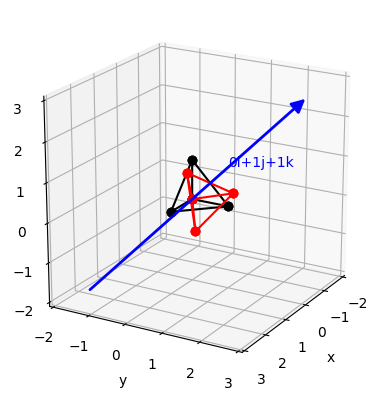

In [44]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=30, roll=0)
ax.plot([O[0],B[0]], [O[1],B[1]], [O[2],B[2]], 'ko', linestyle='-')
ax.plot([O[0],C[0]], [O[1],C[1]], [O[2],C[2]], 'ko', linestyle='-')
ax.plot([O[0],D[0]], [O[1],D[1]], [O[2],D[2]], 'ko', linestyle='-')
ax.plot([C[0],B[0]], [C[1],B[1]], [C[2],B[2]], 'ko', linestyle='-')
ax.plot([D[0],B[0]], [D[1],B[1]], [D[2],B[2]], 'ko', linestyle='-')
ax.plot([C[0],D[0]], [C[1],D[1]], [C[2],D[2]], 'ko', linestyle='-')
ax.plot([O2[0],C2[0]], [O2[1],C2[1]], [O2[2],C2[2]], 'ro', linestyle='-')
ax.plot([O2[0],B2[0]], [O2[1],B2[1]], [O2[2],B2[2]], 'ro', linestyle='-')
ax.plot([O2[0],D2[0]], [O2[1],D2[1]], [O2[2],D2[2]], 'ro', linestyle='-')
ax.plot([C2[0],B2[0]], [C2[1],B2[1]], [C2[2],B2[2]], 'ro', linestyle='-')
ax.plot([C2[0],D2[0]], [C2[1],D2[1]], [C2[2],D2[2]], 'ro', linestyle='-')
ax.plot([D2[0],B2[0]], [D2[1],B2[1]], [D2[2],B2[2]], 'ro', linestyle='-')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
vstring="{}i+{}j+{}k".format(v[0],v[1],v[2])
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='b', shrinkA=0, shrinkB=0, linewidth=2)
a = Arrow3D([-3*v[0], 3*v[0]], [-3*v[1], 3*v[1]], [-3*v[2], 3*v[2]], **arrow_prop_dict)
ax.text(v[0], v[1], v[2], vstring, c='b')
ax.add_artist(a)
ax.axes.set_xlim3d(left=-2, right=3) 
ax.axes.set_ylim3d(bottom=-2, top=3) 
ax.axes.set_zlim3d(bottom=-2, top=3)
plt.gca().set_aspect('equal')
plt.show()

### Part 2: Rotation about axis not at origin
With the axis of rotation no longer passing through the origin, we must translate the coordinates by a distance equal to the effective distance of the axis from the origin. However, and really quite nicely, we can *re-use* the matrix we already calculated for the rotation, and simply book-end it with the necessary translations:

In [51]:
Tmp = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [-C[0],-C[1], -C[2], 1]])
Tpp = np.matrix([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0],
                [C[0], C[1], C[2], 1]])
fp3 = kp.transpose()*Tmp*Rtv*Tpp
print(fp3)

[[ 0.5         0.14644661 -0.14644661  1.        ]
 [ 1.20710678  0.64644661 -0.64644661  1.        ]
 [ 0.          1.          0.          1.        ]
 [ 1.          0.29289322  0.70710678  1.        ]]


With this technique we have very quickly recovered the solutions we determined in the lecture example.

Again, let's take advantage of the power of Python to visualise what this means. Remember that in this second example, the rotation axis passes through the point C, so we would expect that the pyramid rotates about C (while C itself remains unaffected).

Taking the coordinates we found above, we can transpose them and group them together to make a visual comparison with the pyramid we started with.

In [52]:
newp3 = fp3[:,0:3].transpose()
x_vals3n = np.squeeze(np.asarray(newp3[0,:]))
y_vals3n = np.squeeze(np.asarray(newp3[1,:]))
z_vals3n = np.squeeze(np.asarray(newp3[2,:]))
O3 = np.squeeze(np.asarray(newp3[:,0]))
B3 = np.squeeze(np.asarray(newp3[:,1]))
C3 = np.squeeze(np.asarray(newp3[:,2]))
D3 = np.squeeze(np.asarray(newp3[:,3]))

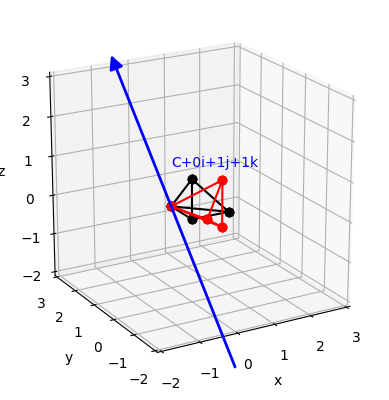

In [60]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=240, roll=0)
ax.plot([O[0],B[0]], [O[1],B[1]], [O[2],B[2]], 'ko', linestyle='-')
ax.plot([O[0],C[0]], [O[1],C[1]], [O[2],C[2]], 'ko', linestyle='-')
ax.plot([O[0],D[0]], [O[1],D[1]], [O[2],D[2]], 'ko', linestyle='-')
ax.plot([C[0],B[0]], [C[1],B[1]], [C[2],B[2]], 'ko', linestyle='-')
ax.plot([D[0],B[0]], [D[1],B[1]], [D[2],B[2]], 'ko', linestyle='-')
ax.plot([C[0],D[0]], [C[1],D[1]], [C[2],D[2]], 'ko', linestyle='-')
ax.plot([O3[0],C3[0]], [O3[1],C3[1]], [O3[2],C3[2]], 'ro', linestyle='-')
ax.plot([O3[0],B3[0]], [O3[1],B3[1]], [O3[2],B3[2]], 'ro', linestyle='-')
ax.plot([O3[0],D3[0]], [O3[1],D3[1]], [O3[2],D3[2]], 'ro', linestyle='-')
ax.plot([C3[0],B3[0]], [C3[1],B3[1]], [C3[2],B3[2]], 'ro', linestyle='-')
ax.plot([C3[0],D3[0]], [C3[1],D3[1]], [C3[2],D3[2]], 'ro', linestyle='-')
ax.plot([D3[0],B3[0]], [D3[1],B3[1]], [D3[2],B3[2]], 'ro', linestyle='-')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
vstring="C+{}i+{}j+{}k".format(v[0],v[1],v[2])
arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color='b', shrinkA=0, shrinkB=0, linewidth=2)
a = Arrow3D([C[0]-3*v[0], C[0]+3*v[0]], [C[1]-3*v[1], C[1]+3*v[1]], [C[2]-3*v[2], C[2]+3*v[2]], **arrow_prop_dict)
ax.text(v[0], v[1], v[2], vstring, c='b')
ax.add_artist(a)
ax.axes.set_xlim3d(left=-2, right=3) 
ax.axes.set_ylim3d(bottom=-2, top=3) 
ax.axes.set_zlim3d(bottom=-2, top=3)
plt.gca().set_aspect('equal')
plt.show()

In this final image I have adjusted the viewing angle to highlight that the rotation does appear to have been performed correctly: one of the points has not been rotated, while the others look to have been achieved by a rotation about the blue axis.

## Over to you
As usual, I recommend that you apply these tools and visualisation techniques to some of the problems seen in the maths tutorial sheet. Can you use Python to confirm your approach to the matrix multiplication by hand? Can you visualise what some of the reflection or rotation questions produce and why?